# Remove Noise with a Linear Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

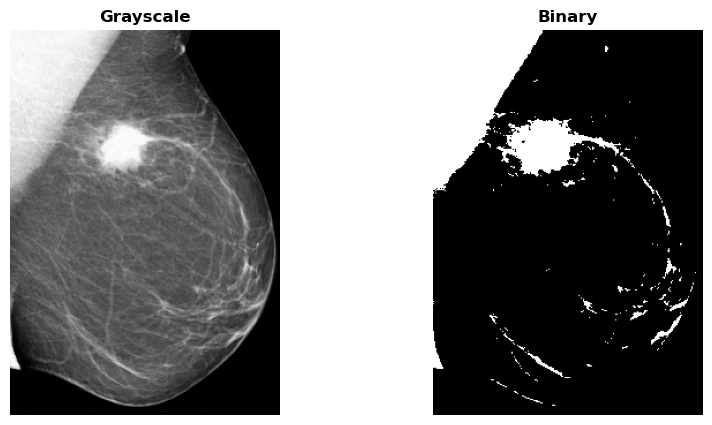

In [2]:
tumor = np.loadtxt("./images/tumorReducedSize.csv", delimiter=",", dtype=np.uint8)
_, tumor_binary = cv2.threshold(tumor, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor, cmap='gray')
axs[0].set_title("Grayscale")
axs[0].axis("off")
axs[1].imshow(tumor_binary, cmap='gray') 
axs[1].set_title("Binary")
axs[1].axis("off")
plt.show()

An "average" filter replaces each pixel with the average of the pixels in the window around it.

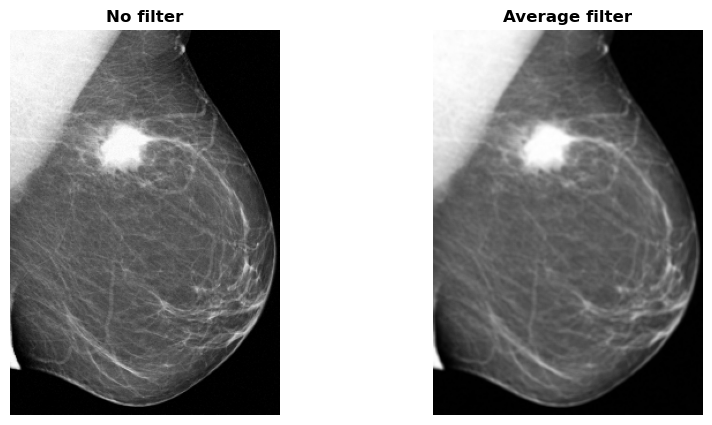

In [3]:
tumor_avg = cv2.blur(tumor, ksize=(3, 3))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor, cmap='gray')
axs[0].set_title("No filter")
axs[0].axis("off")
axs[1].imshow(tumor_avg, cmap='gray') 
axs[1].set_title("Average filter")
axs[1].axis("off")
plt.show()

The goal is to create a better segmentation of the tumor.

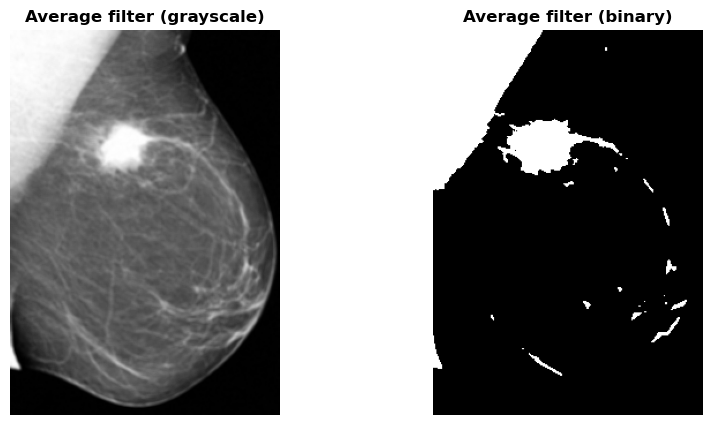

In [4]:
_, tumor_avg_binary = cv2.threshold(tumor_avg, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_avg, cmap='gray')
axs[0].set_title("Average filter (grayscale)")
axs[0].axis("off")
axs[1].imshow(tumor_avg_binary, cmap='gray') 
axs[1].set_title("Average filter (binary)")
axs[1].axis("off")
plt.show()

The new segmentation is cleaner, but at the cost of making the image slightly blurry. When an averaging filter is applied to smooth the image, it is removed both noise and some detail. Using a different filter size will change the appearance of the filtered image and the quality of the segmentation.

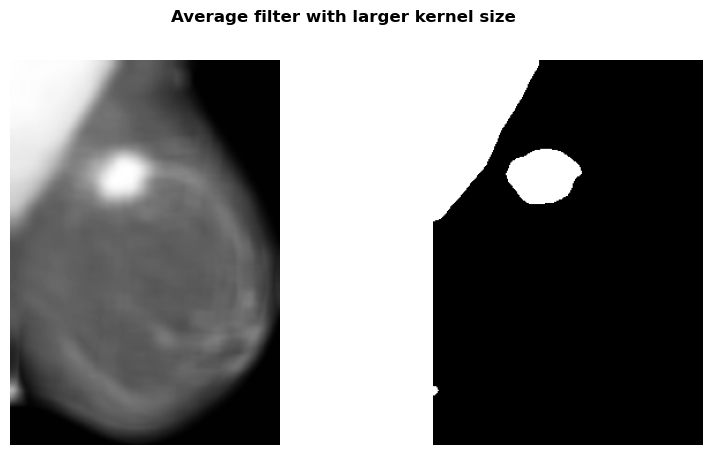

In [5]:
tumor_avg = cv2.blur(tumor, ksize=(15, 15))
_, tumor_avg_binary = cv2.threshold(tumor_avg, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Average filter with larger kernel size")
axs[0].imshow(tumor_avg, cmap='gray')
axs[0].axis("off")
axs[1].imshow(tumor_avg_binary, cmap='gray') 
axs[1].axis("off")
plt.show()